### 线性回归模拟梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1.创建数据 
np.random.seed(666)
X = np.random.random(size = 100)
y = X * 3. +4. +np.random.normal(size = 100)

In [3]:
X.shape

(100,)

In [4]:
y.shape

(100,)

In [5]:
# 2.将 X 转为 100*1的矩阵，形成多维向量
X = X.reshape(-1,1)
X.shape

(100, 1)

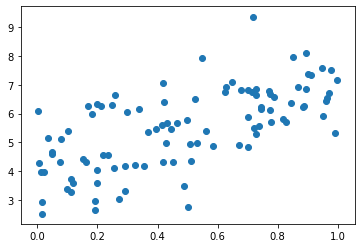

In [6]:
# 3.绘制图像
plt.scatter(X,y)

In [49]:
# 4.生成函数 J ,dJ 分别求损失函数值和阶度
def J(theta,X_b,y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [50]:
def dJ(theta,X_b,y):
    res = np.empty(len(theta))
    #单独对 theta0 项进行处理
    res[0] = np.sum(X_b.dot(theta) - y)
    #s剩下的用 for 循环处理
    for i in range(1,len(theta)):
        #因为在 python 中点乘操作不论是 行×列还是列×行 都会将式子转换乘数，既然转换成一个数了最后就不用再求和了
        res[i] = (X_b.dot(theta)-y).dot(X_b[:,i])
    return (res *2)/len(X_b)

In [51]:
# 用梯度下降法寻找最小值
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [52]:
X_b = np.hstack([np.ones((len(X), 1)), X])
# 这里假设有多个特征，所以对应的 theta 也应该是个向量
initial_theta = np.zeros(X_b.shape[1])

In [53]:
gradient_descent(X_b,y,initial_theta,eta = 0.01)

array([4.0269033, 3.0043078])

### 封装自己的梯度下降法

In [55]:
from pycharm_knn.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [56]:
lin_reg.coef_

array([3.0043078])

In [57]:
lin_reg.intercept_

4.0269033037832385